In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df=pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/MapPLUTO/pluto_22v3.csv")
df.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,MN,574,65,102.0,1006300.0,1.006300e+10,63.0,2001.0,2.0,3.0,10011.0,E033,6.0,15.0,5700.0,1.0,2.0,3A,41 WEST 10 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C6,2.0,0.0,NaN,UNAVAILABLE OWNER,2321.0,6540.0,0.0,6540.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,5.0,5.0,24.5,94.75,25.0,80.00,E,3.0,N,5.0,1.0,567000.0,2223000.0,0.0,1839.0,1989.0,0.0,Greenwich Village Historic District,NaN,2.82,2.43,0.0,4.8,1,1.005740e+09,NaN,63.0,984990.0,206856.0,12c,NaN,103 019,10207.0,NaN,NaN,NaN,1,NaN,NaN,22v3,t,40.734448,-73.997330,NaN
1,BK,3435,45,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,177 COOPER STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B2,1.0,0.0,NaN,"WASHINGTON, TIFFANIE L",2000.0,1800.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,45.00,N,3.0,N,5.0,2.0,12300.0,74940.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.90,2.43,0.0,4.8,3,3.034350e+09,NaN,411.0,1010129.0,190246.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688820,-73.906684,NaN
2,BK,3447,29,304.0,3041100.0,3.041100e+10,411.0,1002.0,32.0,37.0,11207.0,Q252,83.0,34.0,3500.0,3.0,4.0,3B,222 MOFFAT STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,JDC HOME INC.,2000.0,2200.0,0.0,2200.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.0,100.00,20.0,55.00,N,3.0,N,5.0,2.0,11940.0,75780.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.10,0.00,1.0,2.4,3,3.034470e+09,NaN,411.0,1010530.0,190085.0,17c,NaN,309 021,31109.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.688377,-73.905239,NaN
3,BX,2514,10,204.0,2019300.0,2.019300e+10,193.0,4001.0,9.0,8.0,10452.0,E068,44.0,23.0,3310.0,2.0,4.0,2A,1082 OGDEN AVENUE,R7-1,NaN,NaN,NaN,C1-4,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"PINEDA, ARELIS",2875.0,1710.0,0.0,1710.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.0,115.00,19.0,42.67,N,1.0,N,5.0,2.0,14340.0,34560.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.59,3.44,0.0,4.8,2,2.025140e+09,NaN,193.0,1004213.0,243491.0,3b,NaN,210S041,20908.0,NaN,NaN,NaN,1,NaN,NaN,22v3,NaN,40.834979,-73.927858,NaN
4,MN,482,7501,102.0,1004500.0,1.004500e+10,45.0,1006.0,2.0,1.0,10013.0,E055,5.0,15.0,6800.0,1.0,2.0,1A,406 BROOME STREET,C6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,RB,5.0,0.0,NaN,LAFAYETTE COMMERCL CONDO,11750.0,74349.0,74349.0,0.0,9849.0,64500.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,25.0,149.5,100.42,0.0,0.00,NaN,0.0,Y,5.0,5.0,1143002.0,6811650.0,0.0,1900.0,0.0,0.0,SoHo-Cast Iron Historic District Extension,NaN,6.33,6.02,6.0,6.5,1,1.004828e+09,463.0,45.0,984876.0,202030.0,12c,NaN,101N073,10206.0,E-130,1.004821e+09,08/25/1988,1,NaN,NaN,22v3,NaN,40.721202,-73.997742,NaN


In [3]:
df.shape

(858619, 92)

In [4]:
df = df.dropna(subset=['bldgarea','unitstotal'])

In [5]:
df=df[(df['bldgarea']>0) & (df['unitstotal']>0)]

In [6]:
df['borough'].value_counts()

QN    310388
BK    264267
SI    115160
BX     82778
MN     40151
Name: borough, dtype: int64

#### Columns to be considered
- borough
- cd
- landuse
- unitstotal

In [7]:
df["unit.sqft"]=df["bldgarea"]/df["unitstotal"]

In [8]:
df=df[df["unit.sqft"]!=np.inf]

In [9]:
df_grouped = df.groupby(['borough', 'council','landuse'])['unitstotal','bldgarea'].sum()
df_grouped = pd.DataFrame(df_grouped)

In [10]:
pd.DataFrame(df_grouped).head()

unitstotal    bldgarea
borough council landuse                        
BK      2.0     7.0             1.0       500.0
        33.0    1.0          4942.0   7950688.0
                2.0         29003.0  27200644.0
                3.0         26502.0  26252857.0
                4.0         46995.0  51713441.0

In [11]:
#df_grouped.to_csv("Pluto_units.csv")

In [12]:
df_grouped=df_grouped.reset_index()

In [13]:
df_grouped.head()

,borough,council,landuse,unitstotal,bldgarea
0,BK,2.0,7.0,1.0,500.0
1,BK,33.0,1.0,4942.0,7950688.0
2,BK,33.0,2.0,29003.0,27200644.0
3,BK,33.0,3.0,26502.0,26252857.0
4,BK,33.0,4.0,46995.0,51713441.0


In [14]:
df['bbl'].nunique()

812744

In [15]:
df.shape

(812744, 93)

In [17]:
result = df_grouped.merge(df[['borough', 'council','landuse', 'bbl','unitstotal','bldgarea','latitude','longitude']],
                         on=['borough', 'council','landuse'],
                         how='left')

In [18]:
result.head(10)

,borough,council,landuse,unitstotal_x,bldgarea_x,bbl,unitstotal_y,bldgarea_y,latitude,longitude
0,BK,2.0,7.0,1.0,500.0,3.023160e+09,1.0,500.0,40.721982,-73.963971
1,BK,33.0,1.0,4942.0,7950688.0,3.018970e+09,2.0,1260.0,40.695815,-73.960277
2,BK,33.0,1.0,4942.0,7950688.0,3.026920e+09,2.0,2850.0,40.724949,-73.938022
3,BK,33.0,1.0,4942.0,7950688.0,3.027260e+09,2.0,1876.0,40.720221,-73.945472
4,BK,33.0,1.0,4942.0,7950688.0,3.022180e+09,2.0,1944.0,40.701844,-73.957854
5,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,2.0,1800.0,40.701186,-73.958868
6,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,2.0,1800.0,40.701161,-73.958911
7,BK,33.0,1.0,4942.0,7950688.0,3.022170e+09,1.0,1800.0,40.701134,-73.958951
8,BK,33.0,1.0,4942.0,7950688.0,3.022100e+09,2.0,2736.0,40.701713,-73.960122
9,BK,33.0,1.0,4942.0,7950688.0,3.023100e+09,1.0,1466.0,40.720133,-73.958903


In [ ]:
#result.to_csv("pluto_units_square footage.csv")

In [ ]:
#df_grouped.to_csv("Pluto_units.csv")

### Pluto with PUMA and BG

In [200]:
df = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Location/pluto+Puma+BG_31.csv")
df.head()

,Unnamed: 0,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,GISMATCH,GISJOIN,GEOID_left,STATEFIP,State,PUMA,Name,state_abbr,division_n,region_nam,puma_tsv,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,Block_Group,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,167154,QN,13921,50,413.0,4066401.0,4.066401e+10,664.0,1006.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,9 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,DAVID SOTO,3999.0,1386.0,0.0,1386.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,1.0,1.0,40.0,100.0,18.0,24.0,G,1.0,N,2.0,2.0,11760.0,33660.0,0.0,1920.0,0.0,0.0,NaN,NaN,0.35,0.0,1.0,2.4,4,4139210050,NaN,664.0,1055969.0,171246.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636417,-73.741595,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7415949 40.6364169),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
1,167157,QN,13921,40,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,19 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,HENRY KAPLAN,3999.0,788.0,0.0,788.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,1.0,1.0,40.0,100.0,16.0,26.0,G,1.0,N,5.0,2.0,11160.0,28620.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.20,0.0,1.0,2.4,4,4139210040,NaN,664.0,1055852.0,171069.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635932,-73.742018,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7420184 40.635932),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
2,167158,QN,13921,44,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,13 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,ROBERT KUDELYCZ,3999.0,875.0,0.0,875.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.75,1.0,1.0,40.0,100.0,16.0,24.0,N,1.0,N,2.0,1.0,9600.0,27960.0,0.0,1915.0,0.0,0.0,NaN,NaN,0.22,0.0,1.0,2.4,4,4139210044,NaN,664.0,1055892.0,171151.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636157,-73.741873,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7418734 40.6361568),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
3,167161,QN,13921,32,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,27 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,LOIS V SEAMAN,3999.0,1174.0,0.0,1174.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.50,1.0,1.0,40.0,100.0,18.0,25.0,G,1.0,N,2.0,1.0,12300.0,33300.0,1460.0,1920.0,0.0,0.0,NaN,NaN,0.29,0.0,1.0,2.4,4,4139210032,NaN,664.0,1055794.0,170905.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635482,-73.742229,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7422291 40.6354824),11400,36,8

In [201]:
df['council'].value_counts()

31.0    23021
Name: council, dtype: int64

In [202]:
df = df[(df["council"]==31) & (df["landuse"]==1)]
df.head()

,Unnamed: 0,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,GISMATCH,GISJOIN,GEOID_left,STATEFIP,State,PUMA,Name,state_abbr,division_n,region_nam,puma_tsv,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,Block_Group,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,167154,QN,13921,50,413.0,4066401.0,4.066401e+10,664.0,1006.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,9 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,DAVID SOTO,3999.0,1386.0,0.0,1386.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,1.0,1.0,40.0,100.0,18.0,24.0,G,1.0,N,2.0,2.0,11760.0,33660.0,0.0,1920.0,0.0,0.0,NaN,NaN,0.35,0.0,1.0,2.4,4,4139210050,NaN,664.0,1055969.0,171246.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636417,-73.741595,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7415949 40.6364169),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
1,167157,QN,13921,40,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,19 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,HENRY KAPLAN,3999.0,788.0,0.0,788.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,1.0,1.0,40.0,100.0,16.0,26.0,G,1.0,N,5.0,2.0,11160.0,28620.0,0.0,1899.0,0.0,0.0,NaN,NaN,0.20,0.0,1.0,2.4,4,4139210040,NaN,664.0,1055852.0,171069.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635932,-73.742018,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7420184 40.635932),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
2,167158,QN,13921,44,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,13 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,ROBERT KUDELYCZ,3999.0,875.0,0.0,875.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.75,1.0,1.0,40.0,100.0,16.0,24.0,N,1.0,N,2.0,1.0,9600.0,27960.0,0.0,1915.0,0.0,0.0,NaN,NaN,0.22,0.0,1.0,2.4,4,4139210044,NaN,664.0,1055892.0,171151.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.636157,-73.741873,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7418734 40.6361568),11400,36,81,66400,1,360810664001,Block Group 1,G5030,S,763651,63131,40.645053,-73.745636
3,167161,QN,13921,32,413.0,4066401.0,4.066401e+10,664.0,1011.0,29.0,31.0,11422.0,E314,105.0,44.0,3620.0,4.0,13.0,7E,27 1 STREET,M1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,LOIS V SEAMAN,3999.0,1174.0,0.0,1174.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.50,1.0,1.0,40.0,100.0,18.0,25.0,G,1.0,N,2.0,1.0,12300.0,33300.0,1460.0,1920.0,0.0,0.0,NaN,NaN,0.29,0.0,1.0,2.4,4,4139210032,NaN,664.0,1055794.0,170905.0,25a,NaN,417 085,45703.0,NaN,NaN,NaN,1,True,True,22v3,NaN,40.635482,-73.742229,NaN,3603212.0,G36003212,3603212.0,36.0,New York,3212.0,Nassau County (Southwest)--Hempstead Town (Sou...,NY,Middle Atlantic,Northeast,"NY, 03212",POINT (-73.7422291 40.6354824),11400,36,8

In [203]:
df['garagearea'].value_counts()

0.0    22918
Name: garagearea, dtype: int64

In [204]:
df['council'].value_counts()

31.0    23021
Name: council, dtype: int64

In [205]:
df['landuse'].value_counts()

1.0    23021
Name: landuse, dtype: int64

In [206]:
df["unit.sqft"]=df["bldgarea"]/df["unitstotal"]
df["unit.sqft"].head()

0    1386.0
1     788.0
2     875.0
3    1174.0
4    1006.0
Name: unit.sqft, dtype: float64

In [207]:
cols_01=['unit.sqft','numfloors','unitstotal','yearbuilt','GISJOIN','latitude','longitude','Block_Group']

cols_02=['bldg_id','in.sqft','in.geometry_stories','in.geometry_building_number_units_mf','in.vintage_acs',
         'in.geometry_building_type_recs','in.puma','out.natural_gas.total.energy_consumption_intensity',
         'out.site_energy.total.energy_consumption_intensity','in.geometry_garage','in.heating_fuel']

In [208]:
df_match=df[cols_01]
#df_match.to_csv("pluto_84_match.csv")
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001


In [209]:
res = pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Metadata/Metadata_NYC_170123.csv")
res=res[res["in.geometry_garage"]=='None']
res_match=res[cols_02]
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
0,64,853.0,3,3,<1940,Multi-Family with 2 - 4 Units,G36004005,0.0,7.832865,None,Natural Gas
1,69,617.0,2,12,<1940,Multi-Family with 5+ Units,G36004107,0.0,10.223288,None,Electricity
2,76,853.0,3,3,1980-99,Multi-Family with 2 - 4 Units,G36004001,0.0,5.916737,None,Natural Gas
3,132,2590.0,3,30,2010s,Multi-Family with 5+ Units,G36004109,0.0,2.500383,None,Natural Gas
4,200,853.0,1,67,1960-79,Multi-Family with 5+ Units,G36004108,0.0,7.563158,None,Fuel Oil


In [210]:
res_match["in.geometry_building_type_recs"].value_counts()

Multi-Family with 5+ Units       8551
Multi-Family with 2 - 4 Units    3204
Single-Family Attached            976
Single-Family Detached            885
Mobile Home                        22
Name: in.geometry_building_type_recs, dtype: int64

In [211]:
res_match = res_match[(res_match["in.geometry_building_type_recs"] == "Single-Family Detached") | 
                      (res_match["in.geometry_building_type_recs"] == "Single-Family Attached") |
                     (res_match["in.geometry_building_type_recs"] == "Multi-Family with 2 - 4 Units")]

In [212]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2       1875
None    1861
4        838
3        491
Name: in.geometry_building_number_units_mf, dtype: int64

In [213]:
res_match = res_match[(res_match["in.geometry_building_number_units_mf"]=='None') | (res_match["in.geometry_building_number_units_mf"]=='2')]

In [214]:
res_match.shape

(3736, 11)

In [215]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas


**Original Size of Pluto is 23029**

In [216]:
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001


In [217]:
df_match["unitstotal"].value_counts()

1.0    13200
2.0     9811
0.0       10
Name: unitstotal, dtype: int64

#### 1) unit sq.ft bins

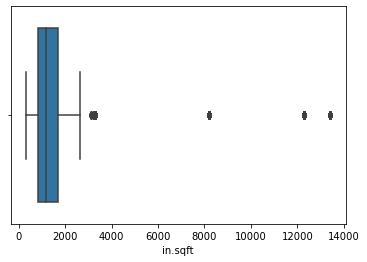

In [218]:
sns.boxplot(res_match['in.sqft'])
plt.show()

In [219]:
df_match.shape

(23021, 8)

In [220]:
#remove inf and zero
df_match=df_match[(df_match['unit.sqft']!=np.inf) & (df_match['unit.sqft']!=0)]
df_match.shape

(23020, 8)

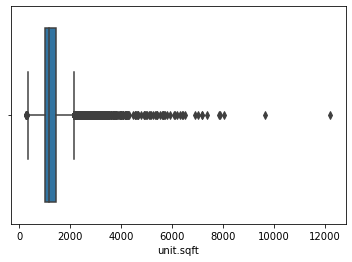

In [221]:
sns.boxplot(df_match['unit.sqft'])
plt.show()

In [222]:
res_match['in.sqft_bins'] = pd.qcut(res_match['in.sqft'], 12, duplicates='drop')
res_match['in.sqft_bins'].value_counts()

(853.0, 1138.0]      759
(617.0, 853.0]       548
(316.999, 617.0]     495
(1623.0, 1690.0]     453
(1138.0, 1202.0]     308
(2152.0, 2631.0]     273
(2631.0, 13414.0]    272
(1220.0, 1623.0]     215
(1690.0, 2152.0]     212
(1202.0, 1220.0]     201
Name: in.sqft_bins, dtype: int64

In [223]:
res_match.shape

(3736, 12)

In [224]:
df_match=df_match[df_match['unit.sqft'] <= 14000]

In [225]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1220.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1220.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1220.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(316.999, 617.0]"


In [226]:
bin_edges = [0,617.0,853.0,1138.0,1202.0,1623.0,1675.0,1690.0,2176.0,2663.0,14000]
df_match['in.sqft_bins'] = pd.cut(df_match['unit.sqft'], bins=bin_edges)
res_match['in.sqft_bins']= pd.cut(res_match['in.sqft'], bins=bin_edges)

In [227]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,in.vintage_acs,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


In [228]:
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]"
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]"
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]"
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]"
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]"


In [229]:
df_match['in.sqft_bins'].value_counts()

(853.0, 1138.0]      7294
(1202.0, 1623.0]     7141
(617.0, 853.0]       2295
(1138.0, 1202.0]     2125
(1690.0, 2176.0]     1999
(2176.0, 2663.0]      641
(0.0, 617.0]          491
(1623.0, 1675.0]      482
(2663.0, 14000.0]     407
(1675.0, 1690.0]      135
Name: in.sqft_bins, dtype: int64

#### 2) Age of building

In [230]:
bin_edges = [0,1940,1960,1980,2000,2010,2023]
df_match['year_bins'] = pd.cut(df_match['yearbuilt'], bins=bin_edges, labels=['<1940','1940-59','1960-79','1980-99','2000-09','2010s'])
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940


In [231]:
res_match = res_match.rename(columns={'in.vintage_acs': 'year_bins'})

In [232]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


#### 3) Number of Units

In [233]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins
5,220,1220.0,1,None,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]"
9,460,1623.0,2,2,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]"
12,801,885.0,1,None,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]"
18,1073,1623.0,2,2,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]"
25,1280,617.0,2,2,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]"


In [234]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2       1875
None    1861
Name: in.geometry_building_number_units_mf, dtype: int64

In [235]:
res_match["in.geometry_building_number_units_mf"]=res_match["in.geometry_building_number_units_mf"].replace("None","1")

In [236]:
res_match["in.geometry_building_number_units_mf"]=res_match["in.geometry_building_number_units_mf"].astype(float)

In [237]:
df_match["unitstotal"].value_counts()

1.0    13199
2.0     9811
Name: unitstotal, dtype: int64

In [238]:
res_match["in.geometry_building_number_units_mf"].value_counts()

2.0    1875
1.0    1861
Name: in.geometry_building_number_units_mf, dtype: int64

#### 4) Floors

In [239]:
res_match['floors_bins'] = pd.qcut(res_match['in.geometry_stories'], 10, duplicates='drop')
res_match['floors_bins'].value_counts()

(0.999, 2.0]    3617
(2.0, 3.0]       119
Name: floors_bins, dtype: int64

In [240]:
df_match['floors_bins'] = pd.qcut(df_match['numfloors'], 3, duplicates='drop')
df_match['floors_bins'].value_counts()

(0.999, 2.0]    19035
(2.0, 3.75]      3962
Name: floors_bins, dtype: int64

In [241]:
res_match['in.geometry_stories'].value_counts()

2    2354
1    1263
3     119
Name: in.geometry_stories, dtype: int64

In [242]:
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940,"(0.999, 2.0]"
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940,"(2.0, 3.75]"
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940,"(0.999, 2.0]"
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940,"(0.999, 2.0]"
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940,"(0.999, 2.0]"


In [243]:
df_match['numfloors'].max()

3.75

In [244]:
bin_edges = [0,1.99,5]
df_match['floors_bins'] = pd.cut(df_match['numfloors'], bins=bin_edges, labels=['<2','>2'])
res_match['floors_bins'] = pd.cut(res_match['in.geometry_stories'], bins=bin_edges, labels=['<2','>2'])
df_match.head()

,unit.sqft,numfloors,unitstotal,yearbuilt,GISJOIN,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins
0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940,>2
1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940,>2
2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940,<2
3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940,<2
4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940,<2


In [245]:
res_match.head()

,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_number_units_mf,year_bins,in.geometry_building_type_recs,in.puma,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel,in.sqft_bins,floors_bins
5,220,1220.0,1,1.0,1960-79,Single-Family Detached,G36004009,0.0,15.487365,None,Natural Gas,"(1202.0, 1623.0]",<2
9,460,1623.0,2,2.0,1960-79,Multi-Family with 2 - 4 Units,G36004014,0.0,7.450650,None,Natural Gas,"(1202.0, 1623.0]",>2
12,801,885.0,1,1.0,<1940,Single-Family Detached,G36004011,0.0,6.109456,None,Natural Gas,"(853.0, 1138.0]",<2
18,1073,1623.0,2,2.0,1940-59,Multi-Family with 2 - 4 Units,G36004016,0.0,3.708803,None,Natural Gas,"(1202.0, 1623.0]",>2
25,1280,617.0,2,2.0,<1940,Multi-Family with 2 - 4 Units,G36004016,0.0,12.082888,None,Natural Gas,"(0.0, 617.0]",>2


In [246]:
res_match = res_match.rename(columns={'in.puma': 'Puma', 'in.geometry_building_number_units_mf': 'no_units'})
df_match = df_match.rename(columns={'GISJOIN': 'Puma', 'unitstotal': 'no_units'})

In [247]:
df_match.shape

(23010, 11)

In [248]:
df_match.reset_index(inplace=True)
df_match.head()

,index,unit.sqft,numfloors,no_units,yearbuilt,Puma,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins
0,0,1386.0,2.00,1.0,1920.0,G36003212,40.636417,-73.741595,360810664001,"(1202.0, 1623.0]",<1940,>2
1,1,788.0,2.50,1.0,1899.0,G36003212,40.635932,-73.742018,360810664001,"(617.0, 853.0]",<1940,>2
2,2,875.0,1.75,1.0,1915.0,G36003212,40.636157,-73.741873,360810664001,"(853.0, 1138.0]",<1940,<2
3,3,1174.0,1.50,1.0,1920.0,G36003212,40.635482,-73.742229,360810664001,"(1138.0, 1202.0]",<1940,<2
4,4,1006.0,1.50,1.0,1920.0,G36003212,40.635375,-73.742283,360810664001,"(853.0, 1138.0]",<1940,<2


In [249]:
df_match['index'].nunique()

23010

### Merging Dataframes

In [250]:
res_plu = pd.merge(df_match, res_match, on=['Puma', 'year_bins', 'in.sqft_bins', 'no_units', 'floors_bins'],how='inner').drop_duplicates()
res_plu.head()

,index,unit.sqft,numfloors,no_units,yearbuilt,Puma,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_type_recs,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
0,9,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.000000,8.950424,None,Natural Gas
1,9,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,141433,885.0,1,Single-Family Detached,2.028317,13.250455,None,Natural Gas
2,9,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,535418,885.0,1,Single-Family Detached,0.000000,9.004402,None,Electricity
3,11,1050.0,1.5,1.0,1925.0,G36004105,40.637096,-73.746810,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.000000,8.950424,None,Natural Gas
4,11,1050.0,1.5,1.0,1925.0,G36004105,40.637096,-73.746810,360810664001,"(853.0, 1138.0]",<1940,<2,141433,885.0,1,Single-Family Detached,2.028317,13.250455,None,Natural Gas


In [251]:
df_match['Puma'].value_counts()

G36004105    14675
G36004114     6709
G36004112     1607
G36003212        9
G36003211        3
Name: Puma, dtype: int64

In [252]:
res_plu['Puma'].value_counts()

G36004105    53227
G36004114     6358
G36004112     4446
Name: Puma, dtype: int64

In [253]:
res_plu.shape

(64031, 20)

In [254]:
res_plu = res_plu.drop_duplicates(subset='index')
res_plu.shape

(16813, 20)

In [255]:
#res_plu.drop('index', axis=1, inplace=True)
#res_plu.head()

In [256]:
res_plu.head()

,index,unit.sqft,numfloors,no_units,yearbuilt,Puma,latitude,longitude,Block_Group,in.sqft_bins,year_bins,floors_bins,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_type_recs,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,in.geometry_garage,in.heating_fuel
0,9,924.0,1.0,1.0,1930.0,G36004105,40.637573,-73.745572,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.0,8.950424,None,Natural Gas
3,11,1050.0,1.5,1.0,1925.0,G36004105,40.637096,-73.746810,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.0,8.950424,None,Natural Gas
6,13,960.0,1.5,1.0,1925.0,G36004105,40.638345,-73.745756,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.0,8.950424,None,Natural Gas
9,18,858.0,1.5,1.0,1925.0,G36004105,40.638681,-73.745070,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.0,8.950424,None,Natural Gas
12,20,1125.0,1.5,1.0,1925.0,G36004105,40.637941,-73.745765,360810664001,"(853.0, 1138.0]",<1940,<2,97920,885.0,1,Single-Family Detached,0.0,8.950424,None,Natural Gas


In [257]:
res_plu['in.geometry_garage'].value_counts()

None    16813
Name: in.geometry_garage, dtype: int64

In [258]:
16813/23018*100

73.04283604135894

- 73% of the single or two family homes in council district 31 were matched with ResStock

### Verifying Heating Fuel

In [262]:
heating_BG=res_plu.groupby("Block_Group")["in.heating_fuel"].max()
heating_BG = pd.DataFrame(heating_BG)
heating_BG

,in.heating_fuel
Block_Group,
360810294003,Propane
360810294004,Propane
360810306001,Natural Gas
360810306002,Natural Gas
360810306003,Natural Gas
360810306004,Natural Gas
360810320001,Natural Gas
360810320002,Natural Gas
360810320003,Natural Gas


In [270]:
ver_bg=pd.read_csv("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/NREL/Validate/Queens_BG_Heating Fuel/acs2021_5yr_B25040_15000US360810110002.csv")
ver_bg.head()

,geoid,name,B25040001,"B25040001, Error",B25040002,"B25040002, Error",B25040003,"B25040003, Error",B25040004,"B25040004, Error",B25040005,"B25040005, Error",B25040006,"B25040006, Error",B25040007,"B25040007, Error",B25040008,"B25040008, Error",B25040009,"B25040009, Error",B25040010,"B25040010, Error"
0,05000US36081,"Queens County, NY",807468,2634,608592,3713,21266,1087,62850,2082,93783,2436,301,126,398,142,595,177,7708,647,11975,896
1,15000US360810001011,"BG 1, Tract 1.01, Queens, NY",1286,233,496,201,20,33,751,245,0,13,0,13,0,13,0,13,0,13,19,31
2,15000US360810001012,"BG 2, Tract 1.01, Queens, NY",1171,341,400,212,0,13,464,173,307,343,0,13,0,13,0,13,0,13,0,13
3,15000US360810001021,"BG 1, Tract 1.02, Queens, NY",664,185,257,155,0,13,407,157,0,13,0,13,0,13,0,13,0,13,0,13
4,15000US360810001022,"BG 2, Tract 1.02, Queens, NY",1688,386,790,366,0,13,786,231,25,40,0,13,0,13,0,13,0,13,87,67


In [271]:
ver_bg["geoid"] = ver_bg["geoid"].str[-12:]

In [272]:
ver_bg["geoid"][1]

'360810001011'

In [67]:
#res_plu.to_csv("res_plu_01.csv")

In [68]:
res_plu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17348 entries, 0 to 70274
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   index                                               17348 non-null  int64   
 1   unit.sqft                                           17348 non-null  float64 
 2   numfloors                                           17348 non-null  float64 
 3   no_units                                            17348 non-null  float64 
 4   yearbuilt                                           17348 non-null  float64 
 5   Puma                                                17348 non-null  object  
 6   latitude                                            17348 non-null  float64 
 7   longitude                                           17348 non-null  float64 
 8   in.sqft_bins                                        17348 non-null

In [69]:
res_plu['age'] = datetime.now().year - res_plu['yearbuilt']

In [71]:
res_plu.head()

,index,unit.sqft,numfloors,no_units,yearbuilt,Puma,latitude,longitude,in.sqft_bins,year_bins,floors_bins,bldg_id,in.sqft,in.geometry_stories,in.geometry_building_type_recs,out.natural_gas.total.energy_consumption_intensity,out.site_energy.total.energy_consumption_intensity,age
0,644445,900.0,2.0,2.0,1950.0,G36004112,40.671127,-73.760401,"(853.0, 1138.0]",1940-59,>2,45479,1138.0,2,Multi-Family with 2 - 4 Units,0.0,7.792394,73.0
2,646294,1080.0,2.0,2.0,1950.0,G36004112,40.671640,-73.770810,"(853.0, 1138.0]",1940-59,>2,45479,1138.0,2,Multi-Family with 2 - 4 Units,0.0,7.792394,73.0
4,652936,900.0,2.0,2.0,1950.0,G36004112,40.671122,-73.760491,"(853.0, 1138.0]",1940-59,>2,45479,1138.0,2,Multi-Family with 2 - 4 Units,0.0,7.792394,73.0
6,656719,900.0,2.0,2.0,1950.0,G36004112,40.671746,-73.760795,"(853.0, 1138.0]",1940-59,>2,45479,1138.0,2,Multi-Family with 2 - 4 Units,0.0,7.792394,73.0
8,656751,900.0,2.0,2.0,1950.0,G36004112,40.671943,-73.760978,"(853.0, 1138.0]",1940-59,>2,45479,1138.0,2,Multi-Family with 2 - 4 Units,0.0,7.792394,73.0


In [73]:
res_plu["bldg_id"].nunique()

174

### Regression for Verification

In [71]:
from sklearn.model_selection import train_test_split

#inorder to get the same rows and columns we shall add a random state

#np.random.seed(0)

df_train,df_test= train_test_split(res_plu,train_size=0.7,test_size=0.3,random_state=100)

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()

num_vars=['unit.sqft','numfloors','no_units','age']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

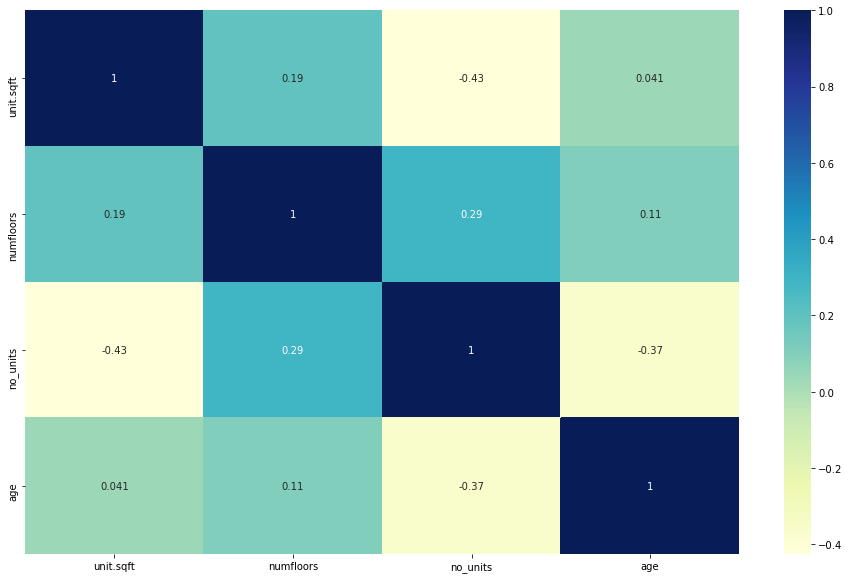

In [74]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(df_train[num_vars].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [75]:
y_train=df_train["out.site_energy.total.energy_consumption_intensity"]
X_train=df_train[num_vars]

In [76]:
X_train.head()

,unit.sqft,numfloors,no_units,age
63700,0.047787,0.4,1.0,0.154472
28453,0.089695,0.4,0.0,0.747967
58101,0.067019,0.4,0.0,0.829268
62311,0.065592,0.4,1.0,0.382114
45994,0.088183,0.2,0.0,0.544715


In [77]:
#pip install numpy --upgrade

In [79]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [81]:
lm_1 = sm.OLS(y_train,X_train).fit()
print(lm_1.summary())

                                            OLS Regression Results                                            
Dep. Variable:     out.site_energy.total.energy_consumption_intensity   R-squared:                       0.329
Model:                                                            OLS   Adj. R-squared:                  0.329
Method:                                                 Least Squares   F-statistic:                     1489.
Date:                                                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                                                        08:50:04   Log-Likelihood:                -25567.
No. Observations:                                               12143   AIC:                         5.114e+04
Df Residuals:                                                   12138   BIC:                         5.118e+04
Df Model:                                                           4                                         
C

### Federal Poverty Level to Home Value

In [82]:
res.head()

,bldg_id,applicability,in.sqft,weight,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,in.building_america_climate_zone,in.cec_climate_zone,in.ceiling_fan,in.census_division,in.census_division_recs,in.census_region,in.city,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dehumidifier,in.dishwasher,in.door_area,in.doors,in.ducts,in.eaves,in.electric_vehicle,in.emissions_electricity_folders,in.emissions_electricity_units,in.emissions_electricity_values_or_filepaths,in.emissions_fossil_fuel_units,in.emissions_fuel_oil_values,in.emissions_natural_gas_values,in.emissions_propane_values,in.emissions_scenario_names,in.emissions_types,in.emissions_wood_values,in.federal_poverty_level,in.generation_and_emissions_assessment_region,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_garage,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.holiday_lighting,in.hot_water_distribution,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_secondary_heating_efficiency,in.hvac_secondary_heating_type_and_fuel,in.hvac_shared_efficiencies,in.hvac_system_is_faulted,in.hvac_system_single_speed_ac_airflow,in.hvac_system_single_speed_ac_charge,in.hvac_system_single_speed_ashp_airflow,in.hvac_system_single_speed_ashp_charge,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.interior_shading,in.iso_rto_region,in.lighting,in.lighting_interior_use,in.lighting_other_use,in.location_region,in.mechanical_ventilation,in.misc_extra_refrigerator,in.misc_freezer,in.misc_gas_fireplace,in.misc_gas_grill,in.misc_gas_lighting,in.misc_hot_tub_spa,in.misc_pool,in.misc_pool_heater,in.misc_pool_pump,in.misc_well_pump,in.natural_ventilation,in.neighbors,in.occupants,in.orientation,in.overhangs,in.plug_load_diversity,in.plug_loads,in.puma,in.puma_metro_status,in.pv_orientation,in.pv_system_size,in.radiant_barrier,in.range_spot_vent_hour,in.reeds_balancing_area,in.refrigerator,in.roof_material,in.schedules,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.solar_hot_water,in.state,in.tenure,in.units_represented,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.fuel_oil.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.propane.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cos

In [84]:
df_match["Puma"].value_counts()

G36004105    14676
G36004114     6710
G36004112     1607
G36003212        9
G36003211        8
Name: Puma, dtype: int64

In [86]:
res_31 = res[res["in.puma"].isin(['G36004105','G36004114','G36004112','G36003212','G36003211'])]
res_31.head()

,bldg_id,applicability,in.sqft,weight,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,in.building_america_climate_zone,in.cec_climate_zone,in.ceiling_fan,in.census_division,in.census_division_recs,in.census_region,in.city,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,in.cooking_range,in.cooling_setpoint,in.cooling_setpoint_has_offset,in.cooling_setpoint_offset_magnitude,in.cooling_setpoint_offset_period,in.corridor,in.county,in.county_and_puma,in.dehumidifier,in.dishwasher,in.door_area,in.doors,in.ducts,in.eaves,in.electric_vehicle,in.emissions_electricity_folders,in.emissions_electricity_units,in.emissions_electricity_values_or_filepaths,in.emissions_fossil_fuel_units,in.emissions_fuel_oil_values,in.emissions_natural_gas_values,in.emissions_propane_values,in.emissions_scenario_names,in.emissions_types,in.emissions_wood_values,in.federal_poverty_level,in.generation_and_emissions_assessment_region,in.geometry_attic_type,in.geometry_building_horizontal_location_mf,in.geometry_building_horizontal_location_sfa,in.geometry_building_level_mf,in.geometry_building_number_units_mf,in.geometry_building_number_units_sfa,in.geometry_building_type_acs,in.geometry_building_type_height,in.geometry_building_type_recs,in.geometry_floor_area,in.geometry_floor_area_bin,in.geometry_foundation_type,in.geometry_garage,in.geometry_stories,in.geometry_stories_low_rise,in.geometry_story_bin,in.geometry_wall_exterior_finish,in.geometry_wall_type,in.has_pv,in.heating_fuel,in.heating_setpoint,in.heating_setpoint_has_offset,in.heating_setpoint_offset_magnitude,in.heating_setpoint_offset_period,in.holiday_lighting,in.hot_water_distribution,in.hot_water_fixtures,in.hvac_cooling_efficiency,in.hvac_cooling_partial_space_conditioning,in.hvac_cooling_type,in.hvac_has_ducts,in.hvac_has_shared_system,in.hvac_has_zonal_electric_heating,in.hvac_heating_efficiency,in.hvac_heating_type,in.hvac_heating_type_and_fuel,in.hvac_secondary_heating_efficiency,in.hvac_secondary_heating_type_and_fuel,in.hvac_shared_efficiencies,in.hvac_system_is_faulted,in.hvac_system_single_speed_ac_airflow,in.hvac_system_single_speed_ac_charge,in.hvac_system_single_speed_ashp_airflow,in.hvac_system_single_speed_ashp_charge,in.income,in.income_recs_2015,in.income_recs_2020,in.infiltration,in.insulation_ceiling,in.insulation_floor,in.insulation_foundation_wall,in.insulation_rim_joist,in.insulation_roof,in.insulation_slab,in.insulation_wall,in.interior_shading,in.iso_rto_region,in.lighting,in.lighting_interior_use,in.lighting_other_use,in.location_region,in.mechanical_ventilation,in.misc_extra_refrigerator,in.misc_freezer,in.misc_gas_fireplace,in.misc_gas_grill,in.misc_gas_lighting,in.misc_hot_tub_spa,in.misc_pool,in.misc_pool_heater,in.misc_pool_pump,in.misc_well_pump,in.natural_ventilation,in.neighbors,in.occupants,in.orientation,in.overhangs,in.plug_load_diversity,in.plug_loads,in.puma,in.puma_metro_status,in.pv_orientation,in.pv_system_size,in.radiant_barrier,in.range_spot_vent_hour,in.reeds_balancing_area,in.refrigerator,in.roof_material,in.schedules,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.solar_hot_water,in.state,in.tenure,in.units_represented,in.usage_level,in.vacancy_status,in.vintage,in.vintage_acs,in.water_heater_efficiency,in.water_heater_fuel,in.water_heater_in_unit,in.weather_file_city,in.weather_file_latitude,in.weather_file_longitude,in.window_areas,in.windows,out.electricity.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.fuel_oil.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.natural_gas.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.propane.total.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.electricity.total.lrmer_low_re_cos

In [87]:
res_31.shape

(769, 273)

In [89]:
res_31["in.federal_poverty_level"].value_counts()

400%+       380
200-300%    113
300-400%    105
0-100%       79
100-150%     58
150-200%     34
Name: in.federal_poverty_level, dtype: int64

In [ ]:
df_31